Tasks : Please complete two to three out of the following:
1. Exploratory Data Analysis, including data
verification. Basically, try to answer the following questions:
* How is the data quality?

* What are the insights that can be obtained from the dataset?
2. Create prediction model workflow that includes:
* Training Pipeline: Starts from data collection (combination), feature engineering, model selection, model training and evaluation.
* Prediction Pipeline: For giving predictions from the trained model in a.
* Model Explainability: Imagine if you need to explain the model to business colleagues, or even other scientists.
3. (Optional) Any other deliverable(s) that you deem interesting. You may use this opportunity to highlight any of your special skill(s).





**IMPORTING LIBRARIES**

In [ ]:
!pip install chart-studio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 656.4 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from keras.layers import LSTM
from datetime import date, timedelta


# Exploratory Data Analysis

**Download a dataset from googledrive using gdown library**

In [ ]:
url = "https://drive.google.com/drive/folders/1R8q7vGr0AcOP6ps_tyvQAQnpeyQbLwHi?usp=drive_link"
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/KBAO Test/dh_causal_lookup.csv',
 '/content/KBAO Test/dh_product_lookup.csv',
 '/content/KBAO Test/dh_store_lookup.csv',
 '/content/KBAO Test/dh_transactions.csv']

In [ ]:
#Load the dataset
df_causal = pd.read_csv('/content/KBAO Test/dh_causal_lookup.csv')
df_product = pd.read_csv('/content/KBAO Test/dh_product_lookup.csv')
df_store = pd.read_csv('/content/KBAO Test/dh_store_lookup.csv')
df_transactions = pd.read_csv('/content/KBAO Test/dh_transactions.csv')

In [ ]:
#display the first few row in each dataset
display(df_causal.head())
display(df_product.head())
display(df_store.head())
display(df_transactions.head())

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1


,upc,product_description,commodity,brand,product_size
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's,25 OZ
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,40 OZ
2,566300028,MILLER CANE SYRUP,syrups,Miller,19 OZ
3,566300029,MILLER CANE SYRUP,syrups,Miller,12 OZ
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain,19 OZ


,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039
3,4,31210
4,5,30044


,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0


In [ ]:
#Let see the information in each dataset and a null value
df_causal.info()
df_product.info()
df_store.info()
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351372 entries, 0 to 351371
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   upc           351372 non-null  int64 
 1   store         351372 non-null  int64 
 2   week          351372 non-null  int64 
 3   feature_desc  351372 non-null  object
 4   display_desc  351372 non-null  object
 5   geography     351372 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ 

In [ ]:
#Find a unique value in each feature
for column_name in df_transactions.columns:
    unique_values = len(df_transactions[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,unique_values=unique_values))

Feature 'upc' has '927' unique values
Feature 'dollar_sales' has '1502' unique values
Feature 'units' has '49' unique values
Feature 'time_of_transaction' has '1440' unique values
Feature 'geography' has '2' unique values
Feature 'week' has '104' unique values
Feature 'household' has '510027' unique values
Feature 'store' has '387' unique values
Feature 'basket' has '3316349' unique values
Feature 'day' has '726' unique values
Feature 'coupon' has '2' unique values


In [ ]:
for column_name in df_causal.columns:
    unique_values = len(df_causal[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,unique_values=unique_values))

Feature 'upc' has '479' unique values
Feature 'store' has '381' unique values
Feature 'week' has '62' unique values
Feature 'feature_desc' has '8' unique values
Feature 'display_desc' has '11' unique values
Feature 'geography' has '2' unique values


In [ ]:
for column_name in df_product.columns:
    unique_values = len(df_product[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,unique_values=unique_values))

Feature 'upc' has '927' unique values
Feature 'product_description' has '872' unique values
Feature 'commodity' has '4' unique values
Feature 'brand' has '131' unique values
Feature 'product_size' has '146' unique values


In [ ]:
for column_name in df_store.columns:
    unique_values = len(df_store[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,unique_values=unique_values))

Feature 'store' has '387' unique values
Feature 'store_zip_code' has '299' unique values


Chage a time_of_transaction data type from integer to object and then split hour and minute to a new column.

In [ ]:
df_transactions['time_of_transaction'] = df_transactions['time_of_transaction'].astype(str)

In [ ]:
# Convert 'time_of_transaction' column to strings with leading zeros for single-digit hours.
df_transactions['time_of_transaction'] = df_transactions['time_of_transaction'].str.zfill(4)

# Convert 'time_of_transaction' column to datetime objects.
df_transactions['time_of_transaction'] = pd.to_datetime(df_transactions['time_of_transaction'], format='%H%M')
df_transactions['time_of_transaction'] = df_transactions['time_of_transaction'].dt.strftime("%H:%M")

In [ ]:
# Split time into hour and minute columns
df_transactions[['hour', 'minute']] = df_transactions['time_of_transaction'].str.split(':', expand=True)

# Convert hour and minute columns to integers
df_transactions['hour'] = df_transactions['hour'].astype(int)
df_transactions['minute'] = df_transactions['minute'].astype(int)

# drop time_of_transaction column
df_transactions = df_transactions.drop('time_of_transaction',axis=1)

In [ ]:
df_transactions.info()
df_transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   upc           int64  
 1   dollar_sales  float64
 2   units         int64  
 3   geography     int64  
 4   week          int64  
 5   household     int64  
 6   store         int64  
 7   basket        int64  
 8   day           int64  
 9   coupon        int64  
 10  hour          int64  
 11  minute        int64  
dtypes: float64(1), int64(11)
memory usage: 475.9 MB


,upc,dollar_sales,units,geography,week,household,store,basket,day,coupon,hour,minute
0,7680850106,0.80,1,2,1,125434,244,1,1,0,11,0
1,3620000470,3.59,1,2,1,125434,244,1,1,0,11,0
2,1800028064,2.25,1,2,1,108320,244,2,1,0,11,37
3,9999985067,0.85,1,2,1,162016,244,3,1,0,11,48
4,9999985131,2.19,1,2,1,89437,244,4,1,0,13,23


In [ ]:
#Find a null value or missing value in df_product
df_product_null = df_product[(df_product['product_size']== " ")  | (df_product['product_size'].isnull())]
df_product_null.head()

,upc,product_description,commodity,brand,product_size
89,1800028064,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,
91,1800028066,H J BUTTERMILK PANCK MIX,pancake mixes,Hungry Jack,
92,1800028067,H J PANCK MX EX LITE COMP,pancake mixes,Hungry Jack,


we design to not using product_size then drop it

In [ ]:
#drop product_size column
df_product = df_product.drop('product_size',axis=1)
df_product.head()

,upc,product_description,commodity,brand
0,111112360,VINCENT S ORIG MARINARA S,pasta sauce,Vincent's
1,566300023,PINE MOUNTAIN SYRUP,syrups,Pine Mountain
2,566300028,MILLER CANE SYRUP,syrups,Miller
3,566300029,MILLER CANE SYRUP,syrups,Miller
4,566300035,PINE MOUNTAIN SYRUP,syrups,Pine Mountain


create a dictionary and map day number to day names


> *Set a Monday is the first day of the week according to international standards for the representation of dates and times*



In [ ]:
# Create a dictionary to map day numbers to day names (starting with Monday as 1)
day_map = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

# Loop to extend the day_map for days beyond the first 7
for i in range(8, len(df_transactions) + 1):
    day_map[i] = day_map[((i - 1) % 7) + 1]

# Replace day numbers with day names using the map
df_transactions['weekday'] = df_transactions['day'].map(day_map)

#updated data
df_transactions.head()


,upc,dollar_sales,units,geography,week,household,store,basket,day,coupon,hour,minute,weekday
0,7680850106,0.80,1,2,1,125434,244,1,1,0,11,0,Monday
1,3620000470,3.59,1,2,1,125434,244,1,1,0,11,0,Monday
2,1800028064,2.25,1,2,1,108320,244,2,1,0,11,37,Monday
3,9999985067,0.85,1,2,1,162016,244,3,1,0,11,48,Monday
4,9999985131,2.19,1,2,1,89437,244,4,1,0,13,23,Monday


In [ ]:
#Let chaek a day and week by random
check_dayname = df_transactions[(df_transactions['day'] == 430)  & (df_transactions['week'] == 62)]
check_dayname

,upc,dollar_sales,units,geography,week,household,store,basket,day,coupon,hour,minute,weekday
2945346,9999966070,1.50,1,1,62,398345,168,1888133,430,0,2,49,Wednesday
2947171,7173000729,2.67,3,1,62,334115,172,1889269,430,0,1,13,Wednesday
2948398,1510000043,1.38,2,1,62,76035,40,1890050,430,0,6,6,Wednesday
2948568,9999985072,0.99,1,2,62,163278,244,1890155,430,0,9,20,Wednesday
2948569,7680828098,0.99,1,2,62,453823,244,1890156,430,0,11,25,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961173,3620000444,1.59,1,2,62,411795,383,1898267,430,0,21,47,Wednesday
2961174,9999985047,1.19,1,2,62,4365,383,1898268,430,0,22,57,Wednesday
2961175,9999985039,1.19,1,2,62,4365,383,1898268,430,0,22,57,Wednesday
2961176,7680828098,0.99,1,2,62,4365,383,1898268,430,0,22,57,Wednesday


In [ ]:
#convert date field from string to datetime
def week_to_month(week):
  # Calculate the approximate month and year
  year = date.today().year - 1

  # Adjust year and month for weeks beyond the standard year
  if week > 52:
    year += 1
    month = 1  # Set month to 1 for week 53
  else:
    # Calculate the first day of the year
    first_day_of_year = date(year, 1, 1)

    # Add the number of weeks to get the approximate date
    approx_date = first_day_of_year + timedelta(weeks=week-1)

    # Extract the month from the approximate date
    month = approx_date.month

  first_day_of_month = date(year, month, 1)
  return first_day_of_month

# Apply the function to the 'week' column
df_transactions['month_start'] = df_transactions['week'].apply(week_to_month)

In [ ]:
df_transactions['month_start'] = df_transactions['month_start'].astype(str)
df_transactions.head()

,upc,dollar_sales,units,geography,week,household,store,basket,day,coupon,hour,minute,weekday,month_start
0,7680850106,0.80,1,2,1,125434,244,1,1,0,11,0,Monday,2023-01-01
1,3620000470,3.59,1,2,1,125434,244,1,1,0,11,0,Monday,2023-01-01
2,1800028064,2.25,1,2,1,108320,244,2,1,0,11,37,Monday,2023-01-01
3,9999985067,0.85,1,2,1,162016,244,3,1,0,11,48,Monday,2023-01-01
4,9999985131,2.19,1,2,1,89437,244,4,1,0,13,23,Monday,2023-01-01


# **DATA COLLECTION**

1.   df_transaction merge with df_store and df_product

In [ ]:
df_transactions_all = pd.merge(df_transactions, df_product, on='upc', how='left').merge(df_store, on='store', how='left')
df_transactions_all.head()

,upc,dollar_sales,units,geography,week,household,store,basket,day,coupon,hour,minute,weekday,month_start,product_description,commodity,brand,store_zip_code
0,7680850106,0.80,1,2,1,125434,244,1,1,0,11,0,Monday,2023-01-01,BARILLA ANGEL HAIR,pasta,Barilla,40222
1,3620000470,3.59,1,2,1,125434,244,1,1,0,11,0,Monday,2023-01-01,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,40222
2,1800028064,2.25,1,2,1,108320,244,2,1,0,11,37,Monday,2023-01-01,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,40222
3,9999985067,0.85,1,2,1,162016,244,3,1,0,11,48,Monday,2023-01-01,PRIVATE LABEL VERMICELLI,pasta,Private Label,40222
4,9999985131,2.19,1,2,1,89437,244,4,1,0,13,23,Monday,2023-01-01,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,40222


In [ ]:
#checking null value
df_transactions_all.isnull().sum()

,0
upc,0
dollar_sales,0
units,0
geography,0
week,0
household,0
store,0
basket,0
day,0
coupon,0


In [ ]:
df_totalsales = df_transactions_all.groupby(['basket'])['dollar_sales'].sum()
df_totalsales

,dollar_sales
basket,
1,4.39
2,2.25
3,0.85
4,4.38
5,4.74
...,...
3316345,9.87
3316346,1.44
3316347,0.99


compare two geography

In [ ]:
store_counts = df_transactions_all.groupby('geography')['store'].count().reset_index(name='store_count')

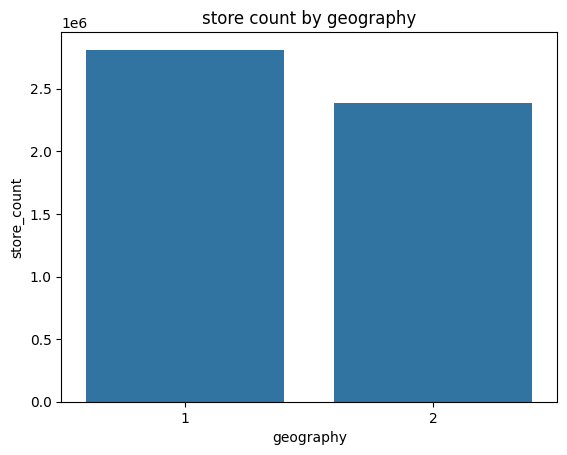

In [ ]:
#Create a barplot to define a store in each geography
sns.barplot(x='geography', y='store_count', data=store_counts)
plt.title('store count by geography')
plt.xlabel('geography')
plt.ylabel('store_count')
plt.show()

Top Brand purchase

In [ ]:
most_brand = df_transactions_all['brand'].value_counts().reset_index(name='brand_count')
most_brand = most_brand.head(5)
most_brand

,brand,brand_count
0,Private Label,1502556
1,Ragu,738294
2,Barilla,388135
3,Prego,342971
4,Private Label Premium,229686


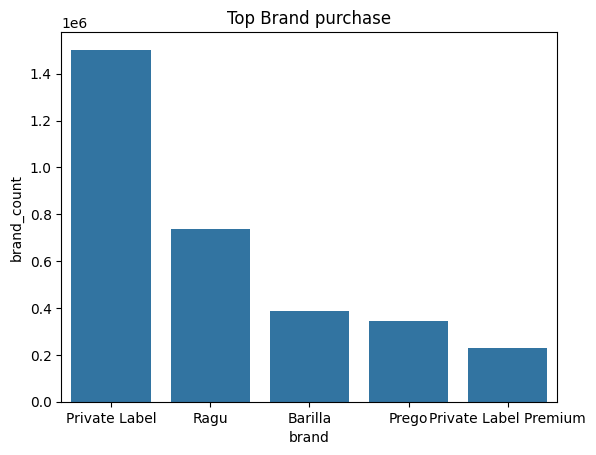

In [ ]:
sns.barplot(data= most_brand,
    x= 'brand',
    y= 'brand_count')
plt.title('Top Brand purchase')
plt.xlabel('brand')
plt.ylabel('brand_count')
plt.show()

Top Commodity

In [ ]:
most_commodity = df_transactions_all['commodity'].value_counts().reset_index(name='commodity_count')
most_commodity

,commodity,commodity_count
0,pasta,2327944
1,pasta sauce,1913522
2,syrups,685918
3,pancake mixes,270297


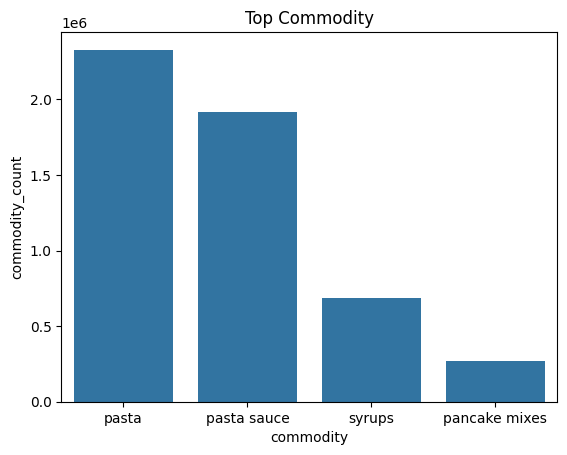

In [ ]:
sns.barplot(data= most_commodity,
    x= 'commodity',
    y= 'commodity_count')
plt.title('Top Commodity')
plt.xlabel('commodity')
plt.ylabel('commodity_count')
plt.show()

In [ ]:
total_price_per_transaction = df_transactions_all.groupby(['household', 'basket'])['units'].sum() * df_transactions_all.groupby(['household', 'basket'])['dollar_sales'].sum()
total_price_per_transaction

household  basket 
1          458810     6.58
           1424208    6.44
           1512312    1.99
           1518809    1.19
           1625631    1.19
                      ... 
510026     756055     2.55
           1097305    3.49
           1767695    2.55
510027     523217     2.69
           814161     3.29
Length: 3316350, dtype: float64

In [ ]:
test = df_transactions_all.groupby(['basket'])['dollar_sales'].sum()
test

,dollar_sales
basket,
1,4.39
2,2.25
3,0.85
4,4.38
5,4.74
...,...
3316345,9.87
3316346,1.44
3316347,0.99




> Data quality of all dataset are not have missing value and have mostly clean data



**Data interpretation**


*   Top Brand purchase by customer the most is Private label
*   Top Commodity is pasta and pasta sauce
* The Store in region 1 have more than region 2


I want to know more

*   when customer come to store and what time ther mostly come?
*   which product customer purchase after the first product in basket?
* where at the display attract customer the most?









#**MODEL feature select**



---
Task : want to forecast monthly total sales by using data month_start and total amount of sale per month


In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_transactions_all, orient="h")
plt.title('Boxplot of df_transactions_all Features')
plt.show()

In [ ]:
df_transactions_all.info()

In [ ]:
monthly_sale = df_transactions_all[['month_start','dollar_sales']]

In [ ]:
monthly_sale = monthly_sale.rename(columns={'month_start':'date'})
monthly_sale.head()

In [ ]:
monthly_sale['date'] = pd.to_datetime(monthly_sale['date'])

In [ ]:
monthly_sale = monthly_sale[monthly_sale['date'].dt.year == 2023]

In [ ]:
#groupby date and sum the sales
monthly_sale = monthly_sale.groupby('date').dollar_sales.sum().reset_index()
monthly_sale.head(15)

In [ ]:
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
sns.lineplot(data=monthly_sale, x="date", y="dollar_sales", ci=None, color="green", marker='o')

In [ ]:
#create a new dataframe to model the difference
monthly_sale_diff = monthly_sale.copy()
#add previous sales to the next row
monthly_sale_diff['prev_dollar_sales'] = monthly_sale_diff['dollar_sales'].shift(1)
#drop the null values and calculate the difference
monthly_sale_diff = monthly_sale_diff.dropna()
monthly_sale_diff['diff'] = (monthly_sale_diff['dollar_sales'] - monthly_sale_diff['prev_dollar_sales'])
monthly_sale_diff.head(10)

In [ ]:
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
sns.lineplot(data=monthly_sale_diff, x="date", y="dollar_diffsales", ci=None, color="green", marker='o')

In the graph above, It is not stationary so I design to get the difference in sales compares to the previous mointh

In [ ]:
monthly_sale_diff2 = monthly_sale_diff.copy()
#add previous sales to the next row
monthly_sale_diff2['prev_dollar_sales'] = monthly_sale_diff2['dollar_sales'].shift(1)
#drop the null values and calculate the difference
monthly_sale_diff2 = monthly_sale_diff2.dropna()
monthly_sale_diff2['diff'] = (monthly_sale_diff2['dollar_sales'] - monthly_sale_diff2['prev_dollar_sales'])
monthly_sale_diff2.head(10)

In [ ]:
plt.figure(figsize=(25,6))
sns.set_style("darkgrid")
sns.lineplot(data=monthly_sale_diff2, x="date", y="dollar_sales", ci=None, color="green", marker='o')

**The result show it is still not stationary and We design to stop and think this method it not suite with the data we have**



*   next I design to move to predict Next purchase day instead of forecast monthly total sales

